In [1]:
#intialize csv files and merge
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

PATH = "/media/hasanfurkan/Data/PY/data_projects/traffic_accidents/"
df_2005to2007 = pd.read_csv(f"{PATH}accidents_2005_to_2007.csv")
df_2009to2011 = pd.read_csv(f"{PATH}accidents_2009_to_2011.csv")
df_2012to2014 = pd.read_csv(f"{PATH}accidents_2012_to_2014.csv")

df_general = pd.concat([df_2005to2007,df_2009to2011,df_2012to2014])
df_general.head()

/tmp/ipykernel_4784/1712153978.py:10: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2005to2007 = pd.read_csv(f"{PATH}accidents_2005_to_2007.csv")
/tmp/ipykernel_4784/1712153978.py:12: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2012to2014 = pd.read_csv(f"{PATH}accidents_2012_to_2014.csv")


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [2]:
#check null data
df_general.isnull().sum()

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

In [3]:
#df_general.loc[df_general["Urban_or_Rural_Area"]==1,"Urban_or_Rural_Area"] = "Urban"
#df_general.loc[df_general["Urban_or_Rural_Area"]==2,"Urban_or_Rural_Area"] = "Rural"
#df_general.loc[df_general["Urban_or_Rural_Area"]==3,"Urban_or_Rural_Area"] = "Unknown"

df_general.Year = df_general.Year.astype(str)
year_count = df_general.groupby("Year")
accidents_year = pd.DataFrame(year_count.size().sort_values(ascending=False),columns=["Accidents"])

road_count = df_general.groupby("Road_Type")
accidents_road=pd.DataFrame(road_count.size().sort_values(ascending=False),columns=["Accidents"])

light_count = df_general.groupby("Light_Conditions")
accidents_light=pd.DataFrame(light_count.size().sort_values(ascending=False),columns=["Accidents"])

weather_count = df_general.groupby("Weather_Conditions")
accidents_weather=pd.DataFrame(weather_count.size().sort_values(ascending=False),columns=["Accidents"])

surface_count = df_general.groupby("Road_Surface_Conditions")
accidents_surface = pd.DataFrame(surface_count.size().sort_values(ascending=False),columns=["Accidents"])

area_count = df_general.groupby("Urban_or_Rural_Area")
accidents_area = pd.DataFrame(area_count.size().sort_values(ascending=False),columns=["Accidents"])
  

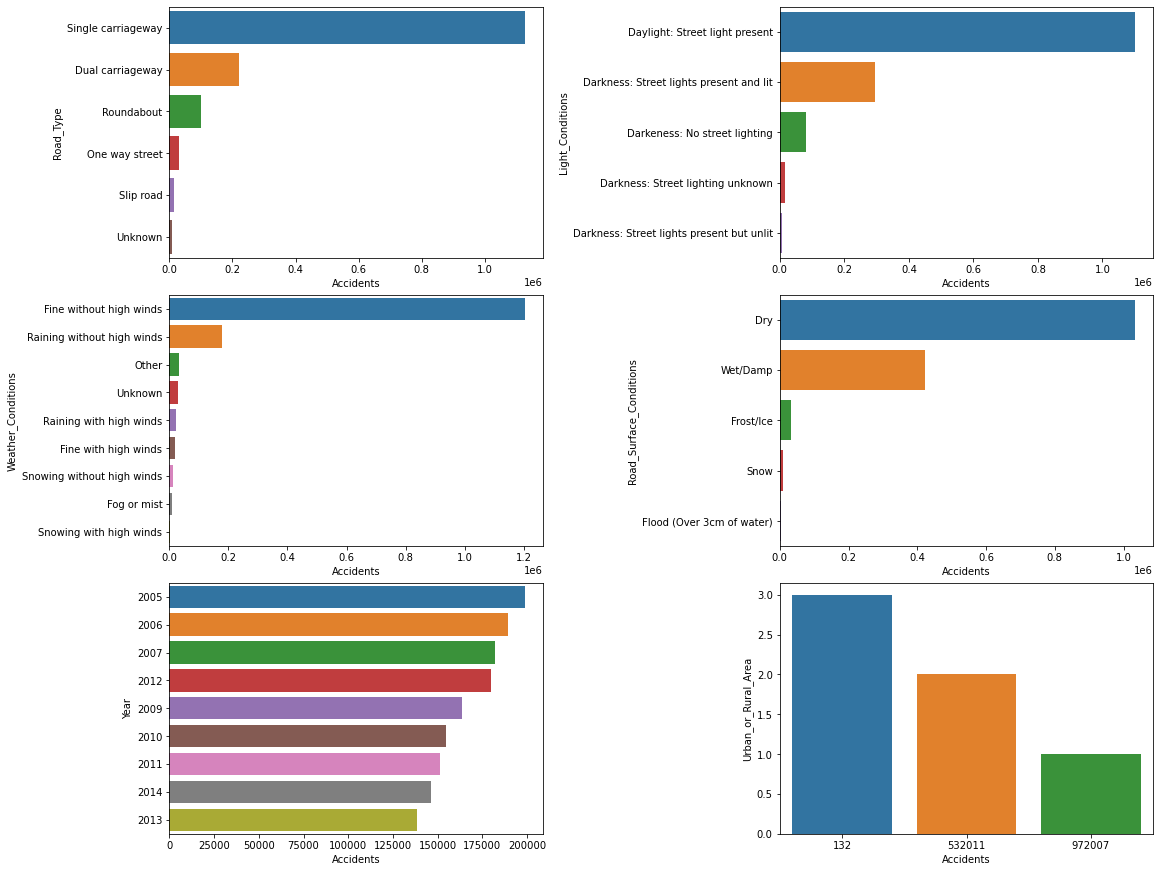

In [4]:
fig, axs = plt.subplots(3,2, figsize = (16,12), constrained_layout = True)

ax = sns.barplot(y = accidents_road.index, x = accidents_road["Accidents"], data = accidents_road, ax = axs[0, 0])
ax = sns.barplot(y = accidents_light.index, x = accidents_light["Accidents"], data = accidents_light, ax = axs[0, 1])
ax = sns.barplot(y = accidents_weather.index, x = accidents_weather["Accidents"], data = accidents_weather, ax = axs[1, 0])
ax = sns.barplot(y = accidents_surface.index, x = accidents_surface["Accidents"], data = accidents_surface, ax = axs[1, 1])
ax = sns.barplot(y = accidents_year.index, x = accidents_year["Accidents"], data= accidents_year, ax = axs[2,0])
ax = sns.barplot(y = accidents_area.index, x = accidents_area["Accidents"], data= accidents_area, ax = axs[2,1])

In [5]:
df_conditions = pd.DataFrame(df_general[[
    "Road_Type",
    "Light_Conditions",
    "Urban_or_Rural_Area",
    ]])
df_conditions.isnull().sum()


Road_Type              0
Light_Conditions       0
Urban_or_Rural_Area    0
dtype: int64

In [6]:
df = pd.get_dummies(df_general, columns=['Road_Type','Weather_Conditions','Light_Conditions','Road_Surface_Conditions',])
df.Speed_limit = df.Speed_limit.astype(int)

In [52]:
casualities = df["Number_of_Casualties"].values
categories = []
for num in casualities:
    if num == 1:
        categories.append("1 casualities")
    elif num > 1 and num < 3 :
        categories.append("1 - 3 casualities")
    elif num > 3 and num < 6 :
        categories.append("3 - 6 casualities")
    elif num > 6 and num < 9 :
        categories.append("6 - 9 casualities")
    elif num > 9 and num < 12 :
        categories.append("9 - 12 casualities")
    else:
        categories.append("12+ casualities")
categories = pd.DataFrame(data=categories, columns = ["Category"])
df = df.reset_index(drop = True)
data = pd.concat([df, categories], axis = 1)
data.drop(columns="Number_of_Casualties", axis = 1, inplace = True)
for i in data.columns

In [59]:
len(data.columns)
a = data.columns[0:47]
#data.isin(["Giveway or uncontrolled"]).any()

In [60]:
from sklearn.model_selection import train_test_split
col_names =a
guess_names = ['Category']
x = data[col_names].values 

y = data[guess_names].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2018)


In [61]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
plt.style.use('bmh')
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train.ravel())

ValueError: could not convert string to float: 'None within 50 metres'